In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from pythreejs import *
from soda import *

/usr/lib/python3/dist-packages/matplotlib/__init__.py:760: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now '/home/ngaravito/.config'/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


In [4]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

# To - DO 

1. Make orbit projections.
3. Implement Vera-Ciro 12 potential.
4. put Sgr orbit

Orbit just with sag!

In [5]:
#def galactocentric_theta_phi():
    
def orbit_plots(t, xyz):
    
    x = xyz[:,0]
    y = xyz[:,1]
    z = xyz[:,2]
    
    figure = figsize(24, 16)
    subplot(2, 3, 1)
    plot(x, y,  c='k', lw=1.5)
    xlabel('$x [Kpc]$', fontsize=25)
    ylabel('$y [Kpc]$', fontsize=25)
    
    subplot(2, 3, 2)
    plot(x, z,  c='k', lw=1.5)
    xlabel('$x [Kpc]$', fontsize=25)
    ylabel('$z [Kpc]$', fontsize=25)
 
    subplot(2, 3, 3)
    plot(y, z,  c='k', lw=1.5)
    xlabel('$y [Kpc]$', fontsize=25)
    ylabel('$z [Kpc]$', fontsize=25)
    
    subplot(2, 3, 4)
    plot(t, (x**2.0+y**2.0+z**2.0)**0.5, c='k', lw=1.5)
    xlabel('$\mathrm{Time [Gyrs]}$', fontsize=25)
    ylabel('$\mathrm{R_{gal}[Kpc]}$', fontsize=25)
    
    

In [6]:
def aitoff_projection(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = arccos(z/r)
    phi = arctan2(y,x)
    
    subplot(111, projection='aitoff')
    plot(theta, phi,lw=1.5, c='k')
    plt.grid(True)
    

# Orbits around a spherical MW

In [7]:
time = 4
pos_sat = [-87.43, -0.51, 37.31]
vel_sat = [16.55, 48.46, -31.33]

pos_NGC2419 = [-87.43, -0.51, 37.31]
vel_NGC2419 = [16.55, 48.46, -31.33]

host_model = ['NFW', 1.2E12, 261, 9.86]
disk_params = [6.5E10, 3.0, 0.5]
bulge_params = [1E10, 0.7]


In [8]:
%time t, posNGC_sphMW, velNGC_sph_MW = leapfrog.integrate_mw(time, pos_NGC2419, vel_NGC2419, host_model, disk_params,\
                                                bulge_params, direction=1, dt=0.001)

CPU times: user 22.5 s, sys: 4.4 ms, total: 22.5 s
Wall time: 22.6 s


In [ ]:
f = """
function f(origu,origv) {
    // scale u and v to the ranges I want: [0, 2*pi]
    var u = 2*Math.PI*origu;
    var v = 2*Math.PI*origv;
    
    var x = Math.sin(u);
    var y = Math.cos(v);
    var z = Math.cos(u+v);
    
    return new THREE.Vector3(x,y,z)
}
"""
surf_g = ParametricGeometry(func=f);

surf = Mesh(geometry=surf_g, material=LambertMaterial(color='green', side='FrontSide'))
surf2 = Mesh(geometry=surf_g, material=LambertMaterial(color='yellow', side='BackSide'))
scene = Scene(children=[surf, surf2, AmbientLight(color='#777777')])
c = PerspectiveCamera(position=[5, 5, 3], up=[0, 0, 1],
                      children=[DirectionalLight(color='white',
                                                 position=[3, 5, 1],
                                                 intensity=0.6)])
renderer = Renderer(camera=c, scene=scene, controls=[OrbitControls(controlling=c)])
display(renderer)



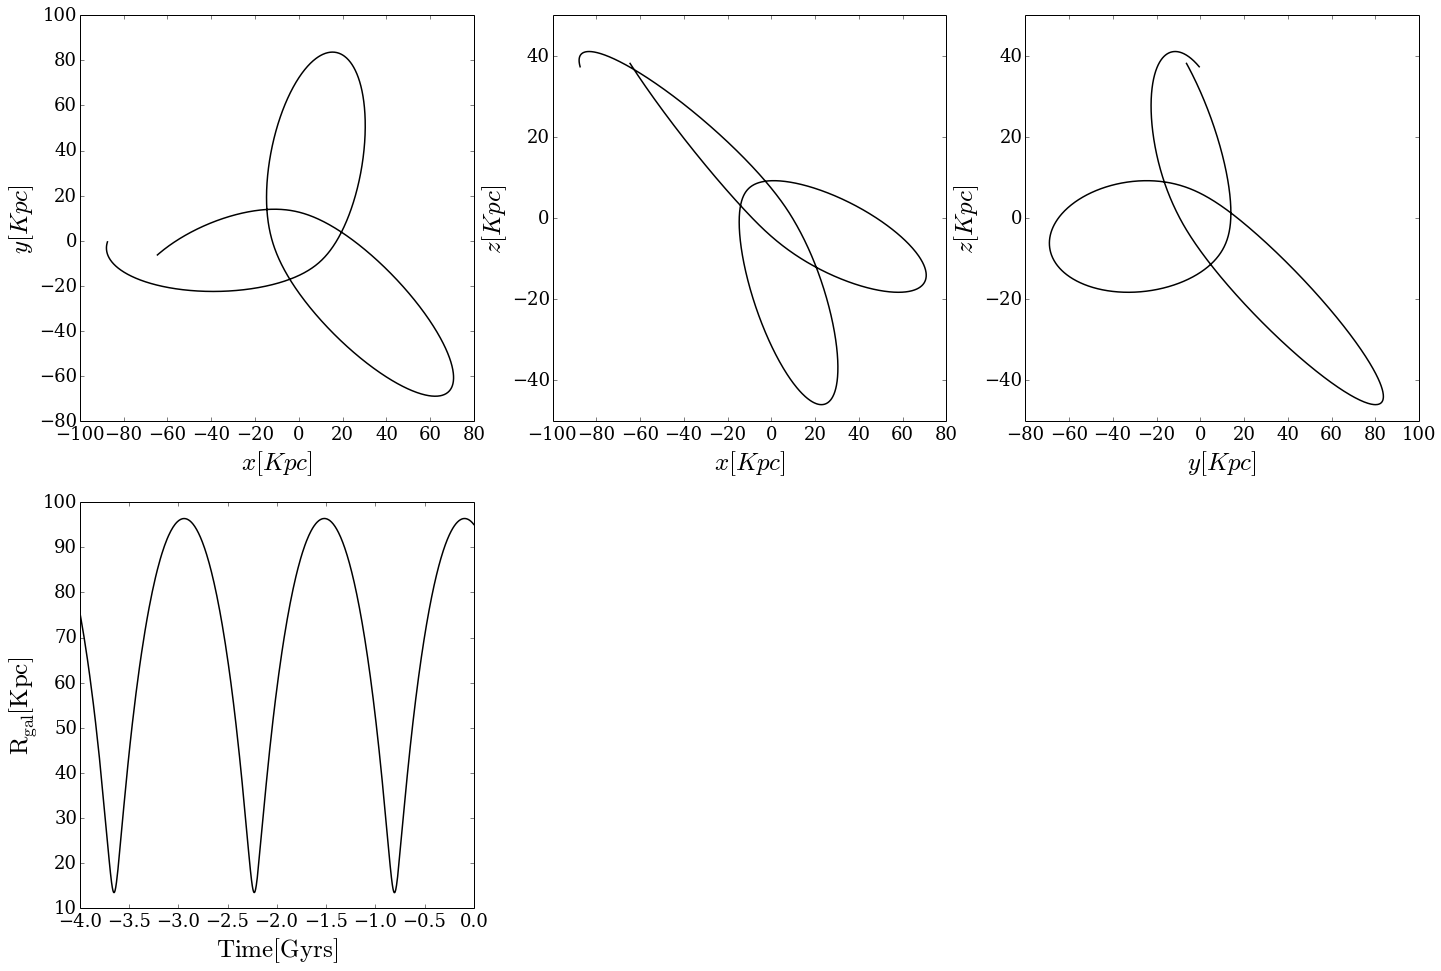

In [7]:
orbit_plots(t, posNGC_sphMW)

#plot(posNGC_sphMW[:,0], posNGC_sphMW[:,2])
#plot(posMW[:,0], posMW[:,1])

savefig('2419_MW_sph.pdf', bbox_inches='tight', dpi=300)

In [37]:
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)



In [63]:
vel_NGC_ar = np.array([vel_NGC2419[0], vel_NGC2419[1], vel_NGC2419[2]])
vel_NGC_ar_normed = vel_NGC_ar/norm(vel_NGC_ar)*50
vel_NGC_ar_normed

array([ 13.78431125,  40.36179597, -26.09440916])

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':
/usr/lib/python3/dist-packages/matplotlib/bezier.py:294: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  path_out = Path(concat([verts_right, path.vertices[i:]]),
/usr/lib/python3/dist-packages/matplotlib/bezier.py:295: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  concat([codes_right, path.codes[i:]]))


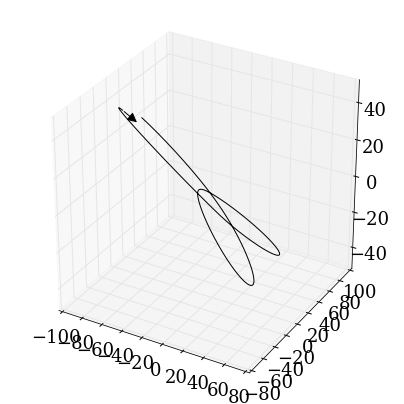

In [64]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(posNGC_sphMW[:,0], posNGC_sphMW[:,1], posNGC_sphMW[:,2], c='k')
ax.add_artist(a)
a=Arrow3D([pos_NGC2419[0],pos_NGC2419[0]+vel_NGC_ar_normed[0]],[pos_NGC2419[1], pos_NGC2419[1]+vel_NGC_ar_normed[1]]
          ,[pos_NGC2419[2], pos_NGC2419[2]+vel_NGC_ar_normed[2]], mutation_scale=20, lw=1, arrowstyle="-|>", color="k")



/usr/lib/python3/dist-packages/matplotlib/cbook.py:1712: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = np.zeros(new_shape, a.dtype)


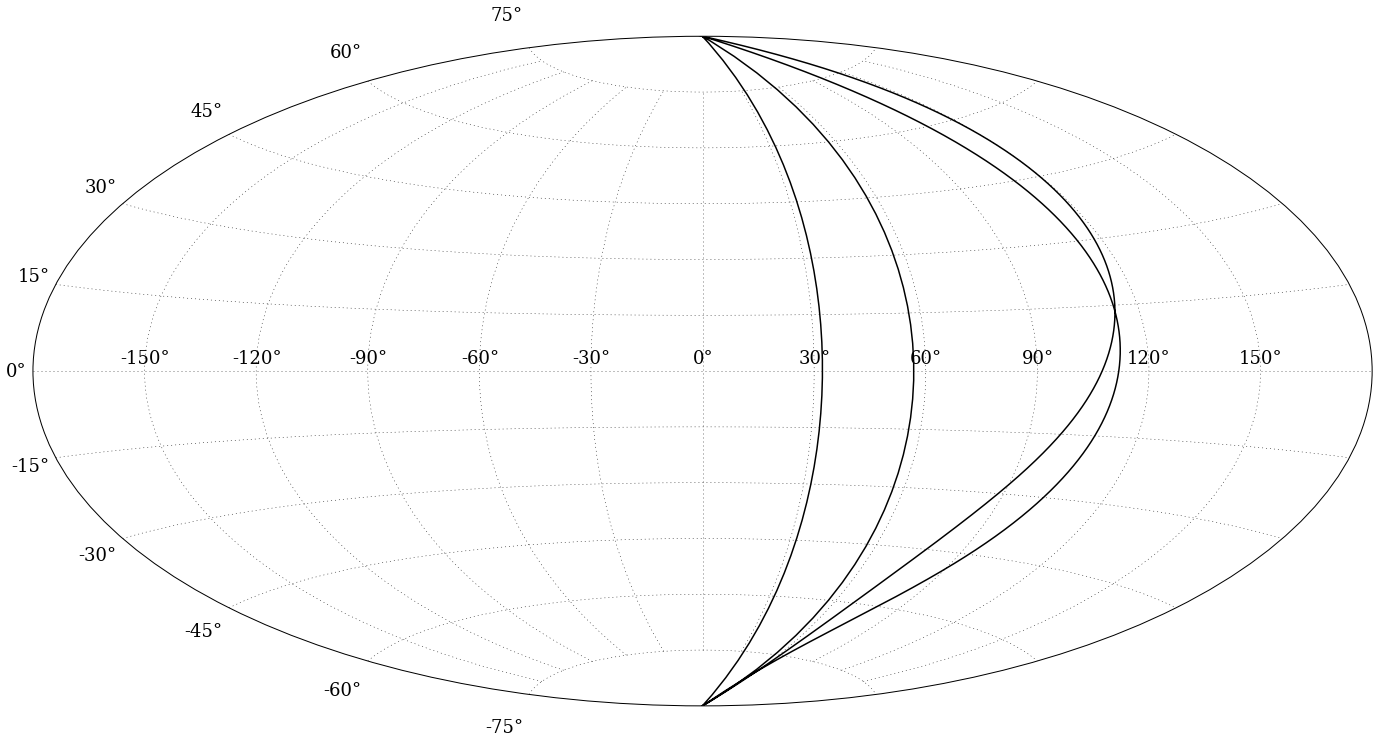

In [9]:
r_sun = [-8.299, 0.0, 0.027]
aitoff_projection(posNGC_sphMW[:,0]-r_sun[0], posNGC_sphMW[:,1]-r_sun[1], posNGC_sphMW[:,2]-r_sun[2])


In [15]:
satellite_model = ['hernquist', 1E9, 5]
sgr_pos = [16.1, 2.35, -6.12]
sgr_vel = [242.5, 5.6, 228.1]
pos_host = [0,0,0]
vel_host = [0,0,0]

In [19]:
t, pos_sag, vel_sag, posMWs, velMWs, posNGCs, velNGCs = leapfrog.integrate_sat(2, pos_host, vel_host, host_model,
                                                                               disk_params, bulge_params, 
                                                                               satellite_model=satellite_model,
                                                                               pos_sat=sgr_pos, vel_sat=sgr_vel,
                                                                               pos_p=pos_NGC2419, vel_p=vel_NGC2419,
                                                                               dt=0.001, alpha=[0, 0.23])


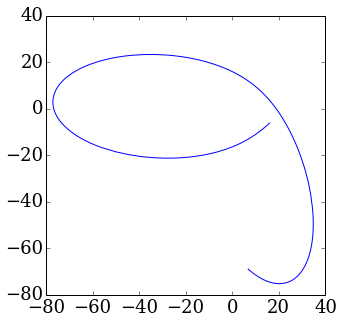

In [20]:
figsize(5, 5)
plot(pos_sag[:,0], pos_sag[:,2])

# Orbits around a spherical MW with an LMC

In [78]:
t, posLMC1, velLMC1, posMW1, velMW1, posNGC1, velNGC1 = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC1',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001)

t, posLMC2, velLMC2, posMW2, velMW2, posNGC2, velNGC2 = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC2',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001)

t, posLMC3, velLMC3, posMW3, velMW3, posNGC3, velNGC3 = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC3',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001)

t, posLMC4, velLMC4, posMW4, velMW4, posNGC4, velNGC4 = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC4',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001)

t, posLMC5, velLMC5, posMW5, velMW5, posNGC5, velNGC5 = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC5',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001)

t, posLMC6, velLMC6, posMW6, velMW6, posNGC6, velNGC6 = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                          disk_params, bulge_params, lmc_model='LMC6',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001)

using the  LMC2
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC3
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC4
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC5
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC6
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0


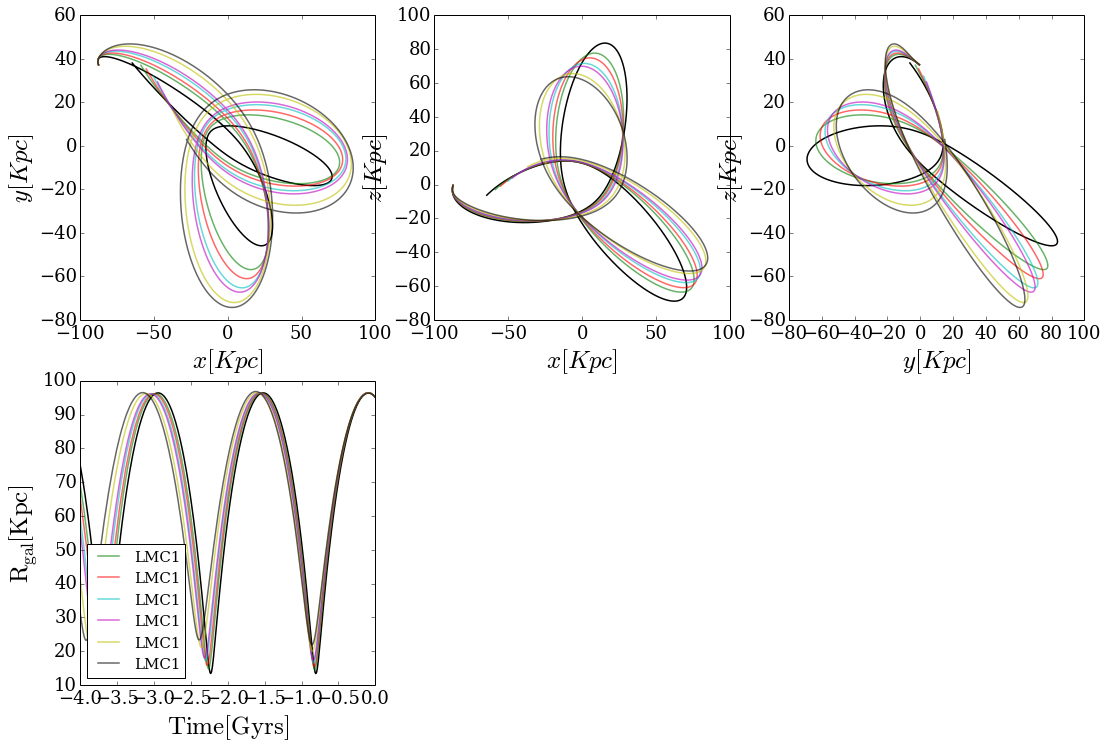

In [140]:
figure(figsize=(18,12))

subplot(2, 3, 1)
plot(posNGC_sphMW[:,0], posNGC_sphMW[:,2], lw=1.5, c='k')
plot(posNGC1_df[:,0]-posMW1_df[:,0], posNGC1_df[:,2]-posMW1_df[:,2], lw=1.5, label='LMC1', alpha=0.6)
plot(posNGC2_df[:,0]-posMW2_df[:,0], posNGC2_df[:,2]-posMW2_df[:,2], lw=1.5, label='LMC2', alpha=0.6)
plot(posNGC3_df[:,0]-posMW3_df[:,0], posNGC3_df[:,2]-posMW3_df[:,2], lw=1.5, label='LMC3', alpha=0.6)
plot(posNGC4_df[:,0]-posMW4_df[:,0], posNGC4_df[:,2]-posMW4_df[:,2], lw=1.5, label='LMC4', alpha=0.6)
plot(posNGC5_df[:,0]-posMW5_df[:,0], posNGC5_df[:,2]-posMW5_df[:,2], lw=1.5, label='LMC5', alpha=0.6)
plot(posNGC6_df[:,0]-posMW6_df[:,0], posNGC6_df[:,2]-posMW6_df[:,2], lw=1.5, label='LMC6', alpha=0.6)

xlabel('$x [Kpc]$', fontsize=25)
ylabel('$y [Kpc]$', fontsize=25)

subplot(2, 3, 2)
plot(posNGC_sphMW[:,0], posNGC_sphMW[:,1], lw=1.5, c='k')
plot(posNGC1_df[:,0]-posMW1_df[:,0], posNGC1_df[:,1]-posMW1_df[:,1], lw=1.5, label='LMC1', alpha=0.6)
plot(posNGC2_df[:,0]-posMW2_df[:,0], posNGC2_df[:,1]-posMW2_df[:,1], lw=1.5, label='LMC2', alpha=0.6)
plot(posNGC3_df[:,0]-posMW3_df[:,0], posNGC3_df[:,1]-posMW3_df[:,1], lw=1.5, label='LMC3', alpha=0.6)
plot(posNGC4_df[:,0]-posMW4_df[:,0], posNGC4_df[:,1]-posMW4_df[:,1], lw=1.5, label='LMC4', alpha=0.6)
plot(posNGC5_df[:,0]-posMW5_df[:,0], posNGC5_df[:,1]-posMW5_df[:,1], lw=1.5, label='LMC5', alpha=0.6)
plot(posNGC6_df[:,0]-posMW6_df[:,0], posNGC6_df[:,1]-posMW6_df[:,1], lw=1.5, label='LMC6', alpha=0.6)

xlabel('$x [Kpc]$', fontsize=25)
ylabel('$z [Kpc]$', fontsize=25)

subplot(2, 3, 3)
plot(posNGC_sphMW[:,1], posNGC_sphMW[:,2], lw=1.5, c='k')
plot(posNGC1_df[:,1]-posMW1_df[:,1], posNGC1_df[:,2]-posMW1_df[:,2], lw=1.5, label='LMC1', alpha=0.6)
plot(posNGC2_df[:,1]-posMW2_df[:,1], posNGC2_df[:,2]-posMW2_df[:,2], lw=1.5, label='LMC2', alpha=0.6)
plot(posNGC3_df[:,1]-posMW3_df[:,1], posNGC3_df[:,2]-posMW3_df[:,2], lw=1.5, label='LMC3', alpha=0.6)
plot(posNGC4_df[:,1]-posMW4_df[:,1], posNGC4_df[:,2]-posMW4_df[:,2], lw=1.5, label='LMC4', alpha=0.6)
plot(posNGC5_df[:,1]-posMW5_df[:,1], posNGC5_df[:,2]-posMW5_df[:,2], lw=1.5, label='LMC5', alpha=0.6)
plot(posNGC6_df[:,1]-posMW6_df[:,1], posNGC6_df[:,2]-posMW6_df[:,2], lw=1.5, label='LMC6', alpha=0.6)

xlabel('$y [Kpc]$', fontsize=25)
ylabel('$z [Kpc]$', fontsize=25)

subplot(2, 3, 4)



r_gal_sphMW = (posNGC_sphMW[:,0]**2.0+posNGC_sphMW[:,1]**2.0+posNGC_sphMW[:,2]**2.0)**0.5
r_gal_sphMWLMC1_df = ((posNGC1_df[:,0]-posMW1_df[:,0])**2.0+(posNGC1_df[:,1]-posMW1_df[:,1])**2.0+(posNGC1_df[:,2]-posMW1_df[:,2])**2.0)**0.5
r_gal_sphMWLMC2_df = ((posNGC2_df[:,0]-posMW2_df[:,0])**2.0+(posNGC2_df[:,1]-posMW2_df[:,1])**2.0+(posNGC2_df[:,2]-posMW2_df[:,2])**2.0)**0.5
r_gal_sphMWLMC3_df = ((posNGC3_df[:,0]-posMW3_df[:,0])**2.0+(posNGC3_df[:,1]-posMW3_df[:,1])**2.0+(posNGC3_df[:,2]-posMW3_df[:,2])**2.0)**0.5
r_gal_sphMWLMC4_df = ((posNGC4_df[:,0]-posMW4_df[:,0])**2.0+(posNGC4_df[:,1]-posMW4_df[:,1])**2.0+(posNGC4_df[:,2]-posMW4_df[:,2])**2.0)**0.5
r_gal_sphMWLMC5_df = ((posNGC5_df[:,0]-posMW5_df[:,0])**2.0+(posNGC5_df[:,1]-posMW5_df[:,1])**2.0+(posNGC5_df[:,2]-posMW5_df[:,2])**2.0)**0.5
r_gal_sphMWLMC6_df = ((posNGC6_df[:,0]-posMW6_df[:,0])**2.0+(posNGC6_df[:,1]-posMW6_df[:,1])**2.0+(posNGC6_df[:,2]-posMW6_df[:,2])**2.0)**0.5

plot(t, r_gal_sphMW, lw=1.5, c='k')
plot(t, r_gal_sphMWLMC1_df, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC2_df, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC3_df, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC4_df, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC5_df, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC6_df, lw=1.5, label='LMC1', alpha=0.6)
legend(loc='best', fontsize=15)

xlabel('$\mathrm{Time [Gyrs]}$', fontsize=25)
ylabel('$\mathrm{R_{gal}[Kpc]}$', fontsize=25)

savefig('2419_sphMW_LMC.pdf', bbox_inches='tight', dpi=300)

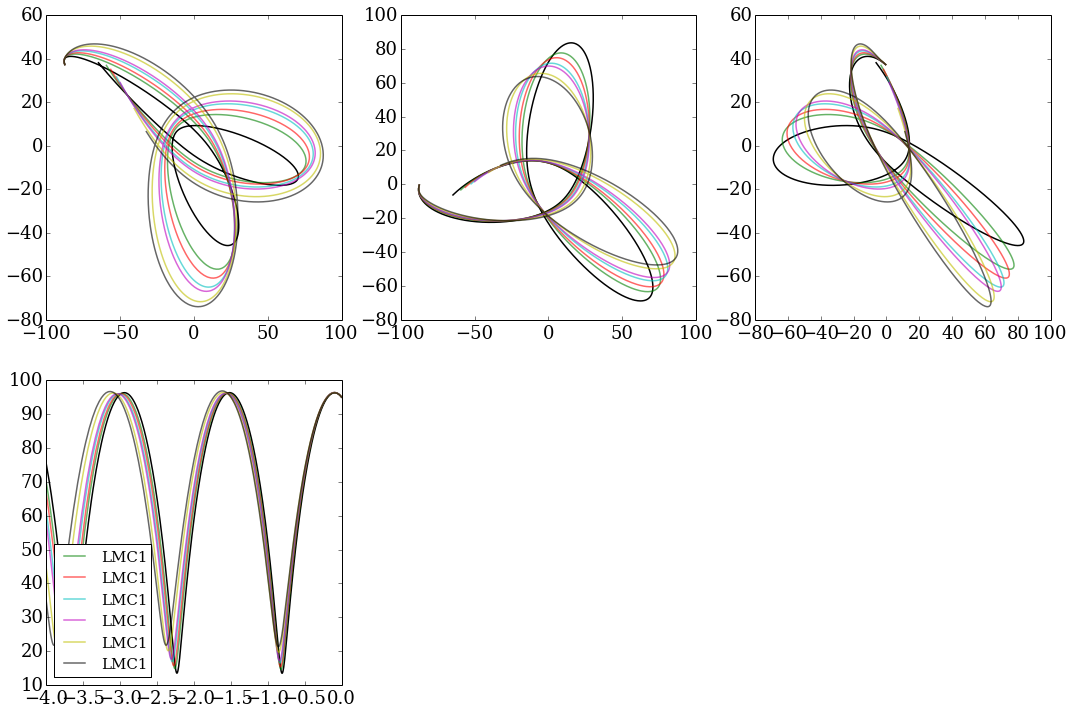

In [131]:
figure(figsize=(18,12))

subplot(2, 3, 1)
plot(posNGC_sphMW[:,0], posNGC_sphMW[:,2], lw=1.5, c='k')
plot(posNGC1[:,0]-posMW1[:,0], posNGC1[:,2]-posMW1[:,2], lw=1.5, label='LMC1', alpha=0.6)
plot(posNGC2[:,0]-posMW2[:,0], posNGC2[:,2]-posMW2[:,2], lw=1.5, label='LMC2', alpha=0.6)
plot(posNGC3[:,0]-posMW3[:,0], posNGC3[:,2]-posMW3[:,2], lw=1.5, label='LMC3', alpha=0.6)
plot(posNGC4[:,0]-posMW4[:,0], posNGC4[:,2]-posMW4[:,2], lw=1.5, label='LMC4', alpha=0.6)
plot(posNGC5[:,0]-posMW5[:,0], posNGC5[:,2]-posMW5[:,2], lw=1.5, label='LMC5', alpha=0.6)
plot(posNGC6[:,0]-posMW6[:,0], posNGC6[:,2]-posMW6[:,2], lw=1.5, label='LMC6', alpha=0.6)

subplot(2, 3, 2)
plot(posNGC_sphMW[:,0], posNGC_sphMW[:,1], lw=1.5, c='k')
plot(posNGC1[:,0]-posMW1[:,0], posNGC1[:,1]-posMW1[:,1], lw=1.5, label='LMC1', alpha=0.6)
plot(posNGC2[:,0]-posMW2[:,0], posNGC2[:,1]-posMW2[:,1], lw=1.5, label='LMC2', alpha=0.6)
plot(posNGC3[:,0]-posMW3[:,0], posNGC3[:,1]-posMW3[:,1], lw=1.5, label='LMC3', alpha=0.6)
plot(posNGC4[:,0]-posMW4[:,0], posNGC4[:,1]-posMW4[:,1], lw=1.5, label='LMC4', alpha=0.6)
plot(posNGC5[:,0]-posMW5[:,0], posNGC5[:,1]-posMW5[:,1], lw=1.5, label='LMC5', alpha=0.6)
plot(posNGC6[:,0]-posMW6[:,0], posNGC6[:,1]-posMW6[:,1], lw=1.5, label='LMC6', alpha=0.6)

subplot(2, 3, 3)
plot(posNGC_sphMW[:,1], posNGC_sphMW[:,2], lw=1.5, c='k')
plot(posNGC1[:,1]-posMW1[:,1], posNGC1[:,2]-posMW1[:,2], lw=1.5, label='LMC1', alpha=0.6)
plot(posNGC2[:,1]-posMW2[:,1], posNGC2[:,2]-posMW2[:,2], lw=1.5, label='LMC2', alpha=0.6)
plot(posNGC3[:,1]-posMW3[:,1], posNGC3[:,2]-posMW3[:,2], lw=1.5, label='LMC3', alpha=0.6)
plot(posNGC4[:,1]-posMW4[:,1], posNGC4[:,2]-posMW4[:,2], lw=1.5, label='LMC4', alpha=0.6)
plot(posNGC5[:,1]-posMW5[:,1], posNGC5[:,2]-posMW5[:,2], lw=1.5, label='LMC5', alpha=0.6)
plot(posNGC6[:,1]-posMW6[:,1], posNGC6[:,2]-posMW6[:,2], lw=1.5, label='LMC6', alpha=0.6)

subplot(2, 3, 4)

r_gal_sphMW = (posNGC_sphMW[:,0]**2.0+posNGC_sphMW[:,1]**2.0+posNGC_sphMW[:,2]**2.0)**0.5
r_gal_sphMWLMC1 = ((posNGC1[:,0]-posMW1[:,0])**2.0+(posNGC1[:,1]-posMW1[:,1])**2.0+(posNGC1[:,2]-posMW1[:,2])**2.0)**0.5
r_gal_sphMWLMC2 = ((posNGC2[:,0]-posMW2[:,0])**2.0+(posNGC2[:,1]-posMW2[:,1])**2.0+(posNGC2[:,2]-posMW2[:,2])**2.0)**0.5
r_gal_sphMWLMC3 = ((posNGC3[:,0]-posMW3[:,0])**2.0+(posNGC3[:,1]-posMW3[:,1])**2.0+(posNGC3[:,2]-posMW3[:,2])**2.0)**0.5
r_gal_sphMWLMC4 = ((posNGC4[:,0]-posMW4[:,0])**2.0+(posNGC4[:,1]-posMW4[:,1])**2.0+(posNGC4[:,2]-posMW4[:,2])**2.0)**0.5
r_gal_sphMWLMC5 = ((posNGC5[:,0]-posMW5[:,0])**2.0+(posNGC5[:,1]-posMW5[:,1])**2.0+(posNGC5[:,2]-posMW5[:,2])**2.0)**0.5
r_gal_sphMWLMC6 = ((posNGC6[:,0]-posMW6[:,0])**2.0+(posNGC6[:,1]-posMW6[:,1])**2.0+(posNGC6[:,2]-posMW6[:,2])**2.0)**0.5

plot(t, r_gal_sphMW, lw=1.5, c='k')
plot(t, r_gal_sphMWLMC1, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC2, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC3, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC4, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC5, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC6, lw=1.5, label='LMC1', alpha=0.6)
legend(loc='best', fontsize=15)

# Now with df 

In [95]:
LMC1_Nbody = np.loadtxt('../../LMC-MW/code/LMC_orbit/orbits/LMC6_H1.txt')

In [116]:
t_t, posLMC_test, velLMC_test, posMW_test, velMW_test = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC6',\
                                                                           dt=0.01, alpha=[0, 0.26])

using the  LMC6


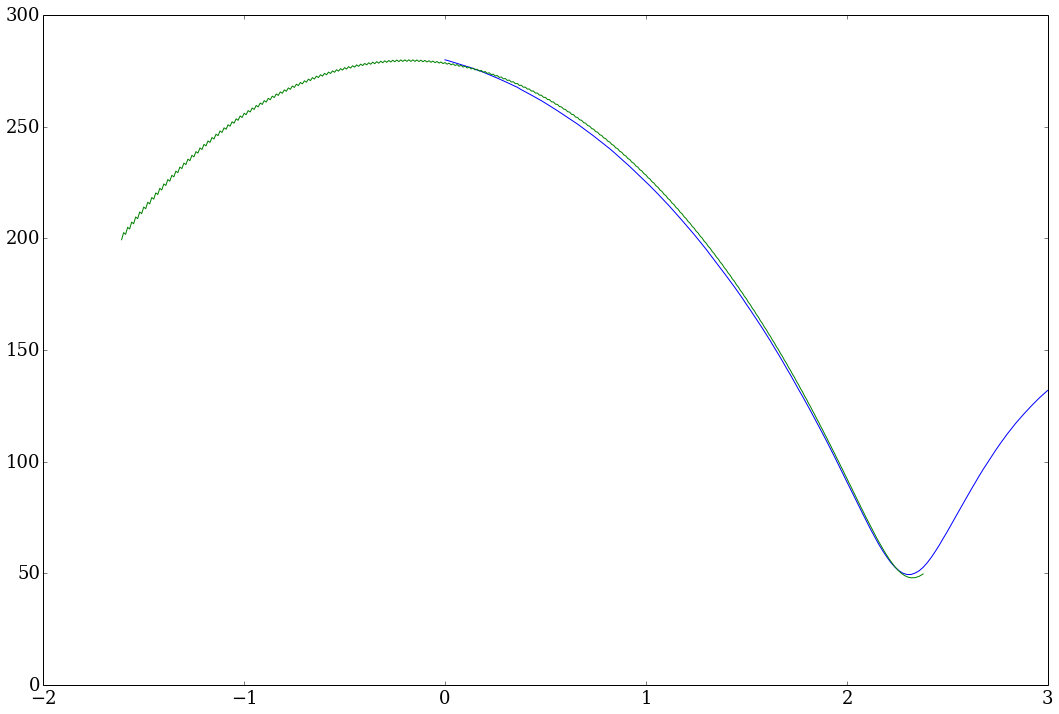

In [117]:
LMC6_t = ((posLMC_test[:,0]-posMW_test[:,0])**2 + (posLMC_test[:,1]-posMW_test[:,1])**2 + (posLMC_test[:,2]-posMW_test[:,2])**2)**0.5
plot(LMC1_Nbody[:,0], LMC1_Nbody[:,1])

plot(t_t+LMC1_Nbody[119,0], LMC6_t)

In [128]:
t, posLMC1_df, velLMC1_df, posMW1_df, velMW1_df, posNGC1_df, velNGC1_df = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC1',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001,
                                                                              alpha=[0, 0.26])

t, posLMC2_df, velLMC2_df, posMW2_df, velMW2_df, posNGC2_df, velNGC2_df = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC2',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001,
                                                                              alpha=[0, 0.26])

t, posLMC3_df, velLMC3_df, posMW3_df, velMW3_df, posNGC3_df, velNGC3_df = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC3',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001,
                                                                              alpha=[0, 0.26])

t, posLMC4_df, velLMC4_df, posMW4_df, velMW4_df, posNGC4_df, velNGC4_df = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC4',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001,
                                                                              alpha=[0, 0.26])

t, posLMC5_df, velLMC5_df, posMW5_df, velMW5_df, posNGC5_df, velNGC5_df = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC5',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001,
                                                                              alpha=[0, 0.26])

t, posLMC6_df, velLMC6_df, posMW6_df, velMW6_df, posNGC6_df, velNGC6_df = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                          disk_params, bulge_params, lmc_model='LMC6',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001,
                                                                              alpha=[0, 0.26])

using the  LMC1
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC2
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC3
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC4
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC5
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC6
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0


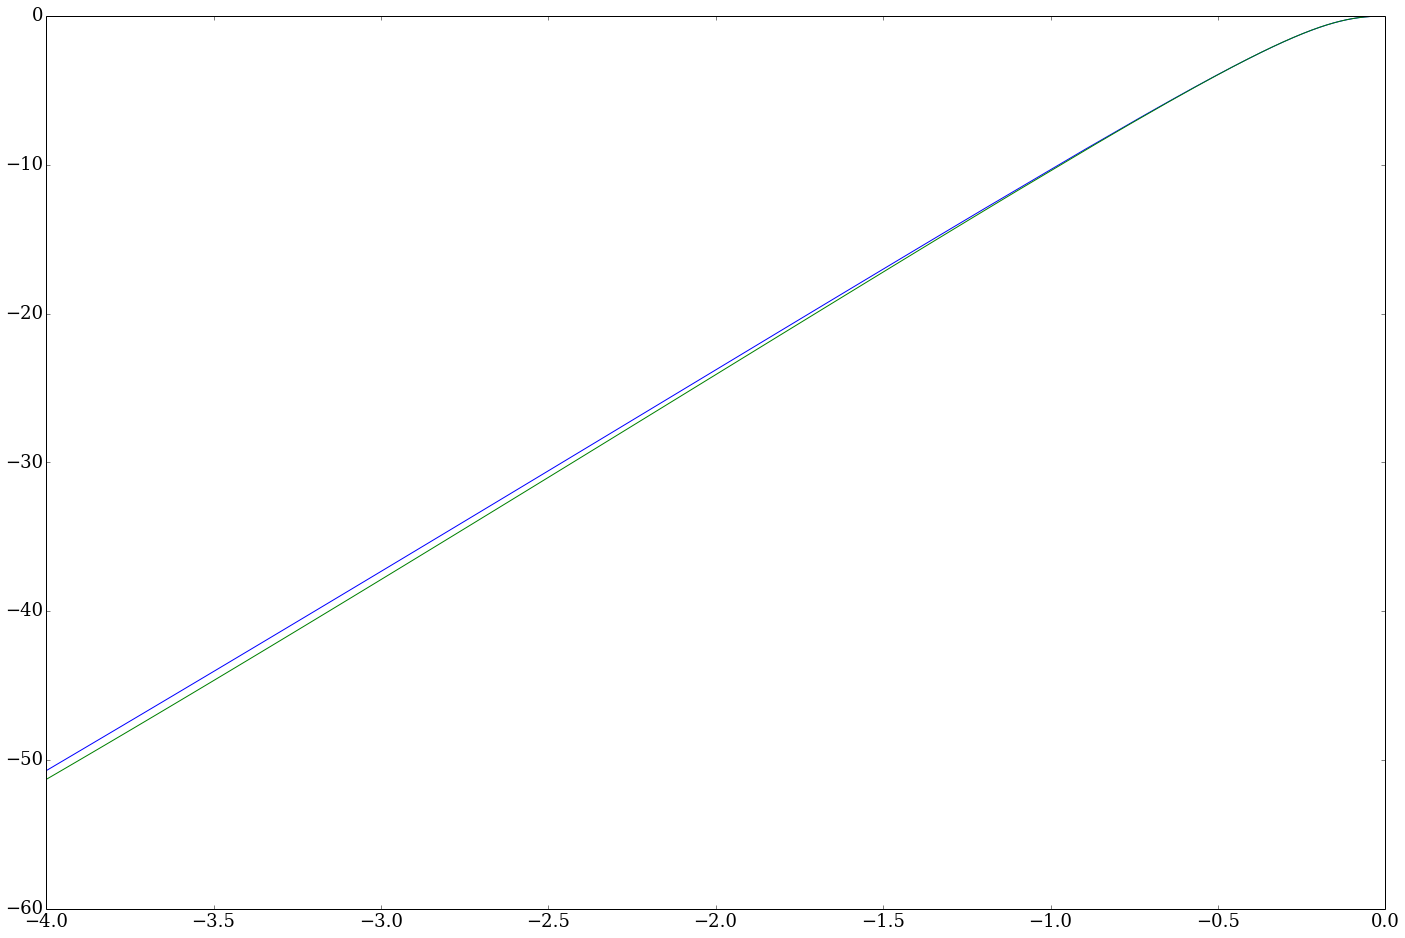

In [137]:
plot(t,posMW1[:,2] )
plot(t,posMW1_df[:,2] )

# Orbits in the Vera-Ciro 13 potential